# Fall 2021 Data Science Intern Challenge 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

## Question 1

In [2]:
data = pd.read_csv('./2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv', parse_dates=['created_at'])
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11


### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

In [3]:
data['total_items'].unique()

array([   2,    1,    3, 2000,    4,    5,    6,    8])

By checking the unique **total items** for the entire dataset, there is an outlier 2000, which means that the **order amount** for some orders with 2000 items is extremely high, so it will affect (increase) the average order value over this 30 day window. 

So I'd like to check the details of those orders with 2000 **total items**.

In [4]:
data[data['total_items'] == 2000].sort_values(by='created_at')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00


As can be seen from the above table, these orders follow some similiar rules. For example, they were all from the same shop (42), they were all from the same customer (user_id), they were all paid by credit card, and orders were all created at 4 o'clock (this can be further analyzed for more information). 

Therefore, I decided to group the data by **shop** and display the average order value of each shop in a bar chart.

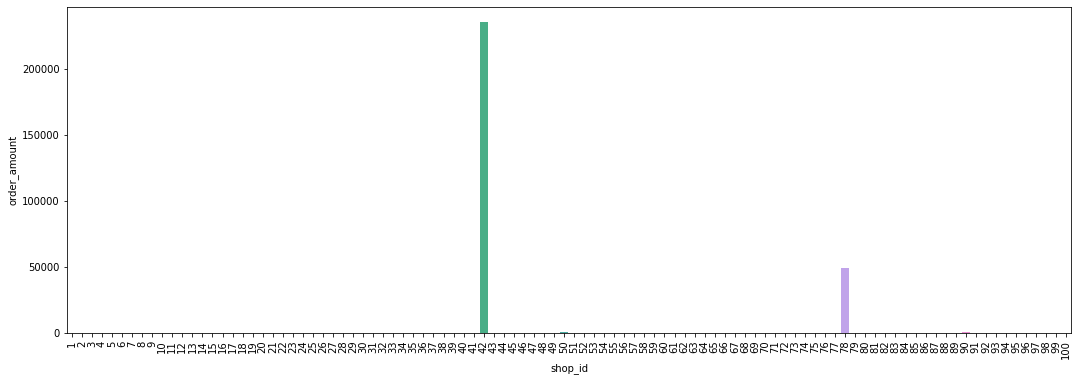

In [5]:
groupby_shop = data[['order_amount', 'shop_id']].groupby('shop_id').mean().reset_index()

# Visualization
fig, ax = plt.subplots(figsize=(18, 6))
plt.xticks(rotation='90')
sns.barplot(x='shop_id', y='order_amount', data=groupby_shop, ax=ax)
plt.show()

In addition to shop 42, we can see that the AOV of shop 78 is also very abnormal.

In [6]:
data[data['shop_id'] == 78].sort_values(by='created_at')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4311,4312,78,960,51450,2,debit,2017-03-01 03:02:10
4412,4413,78,756,51450,2,debit,2017-03-02 04:13:39
4040,4041,78,852,25725,1,cash,2017-03-02 14:31:12
2821,2822,78,814,51450,2,cash,2017-03-02 17:13:25
2492,2493,78,834,102900,4,debit,2017-03-04 04:37:34
4715,4716,78,818,77175,3,debit,2017-03-05 05:10:44
511,512,78,967,51450,2,cash,2017-03-09 07:23:14
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35
3780,3781,78,889,25725,1,cash,2017-03-11 21:14:50
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57


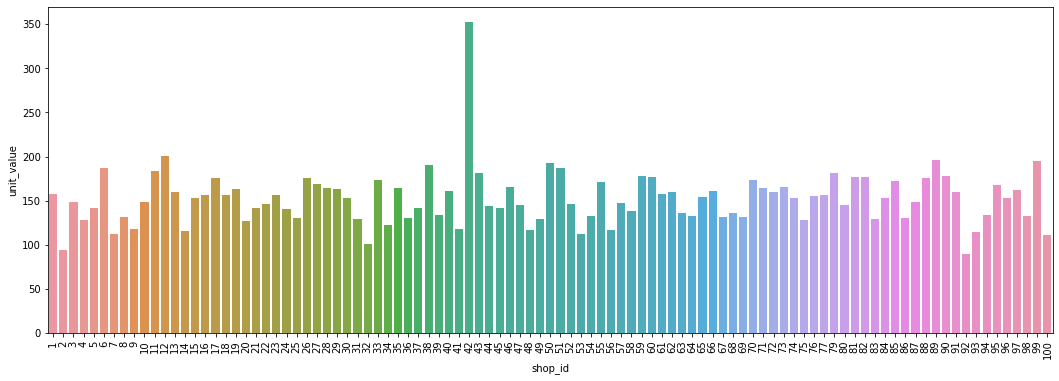

In [7]:
data['unit_value'] = data['order_amount'] / data['total_items']
pre_data = data[data['shop_id'] != 78]
groupby_unit = pre_data[['shop_id', 'unit_value']].groupby('shop_id').mean().reset_index()

# Visualization
fig, ax = plt.subplots(figsize=(18, 6))
plt.xticks(rotation='90')
sns.barplot(x='shop_id', y='unit_value', data=groupby_unit, ax=ax)
plt.show()

From the above table, the unit price of items in shop 78 is very high, which is obviously different from the unit prices of shoes in other shops. 

And from the above plot, the unit price of the items in shop 42 is also different from the unit price of shoes in other shops.

Therefore, I decided to compare the AOV of the data processed by the two methods:
1. By deleting the data both from shop 42 and shop 78 
2. By deleting the abnormal data from shop 42 (with 2000 **total items**) and data from shop 78

In [8]:
pre_data1 = data[(data['shop_id'] != 42) & (data['shop_id'] != 78)]
groupby_shop1 = pre_data1[['order_amount', 'shop_id']].groupby('shop_id').mean().reset_index()
groupby_shop1['order_amount'].mean()

299.68239912615485

In [9]:
pre_data2 = data[(data['total_items'] != 2000) & (data['shop_id'] != 78)]
groupby_shop2 = pre_data2[['order_amount', 'shop_id']].groupby('shop_id').mean().reset_index()
groupby_shop2['order_amount'].mean()

303.24353947960424

Although the unit price of shop 42 is different from other stores, the AOV calculated by the two data sets after processing is not much different. So I chose to exclude the abnormal data from shop 42 (with 2000 total items) and data from shop 78.

### b. What metric would you report for this dataset?

For this dataset, I'd like to report the following metrics:
1. AOV for each shop
2. AOV for shop 78 itself
3. AOV for the remaining data by deleting the abnormal data from shop 42 (with 2000 total items) and data from shop 78
4. AOV for each day by deleting the abnormal data from shop 42 (with 2000 total items) and data from shop 78

### c. What is its value?

#### 1. The AOV for each shop (over the 30 day window)

In [10]:
# can be output as excel file
data[['order_amount', 'shop_id']].groupby('shop_id').mean().reset_index()

,shop_id,order_amount
0,1,308.818182
1,2,174.327273
2,3,305.250000
3,4,258.509804
4,5,290.311111
...,...,...
95,96,330.000000
96,97,324.000000
97,98,245.362069
98,99,339.444444


#### 2. The AOV for shop 78 (over the 30 day window)

In [11]:
data[data['shop_id'] == 78]['order_amount'].mean()

49213.04347826087

#### 3. AOV for the remaining data by deleting the abnormal data from shop 42 (with 2000 total items) and data from shop 78 (over the 30 day window)

In [12]:
groupby_shop2['order_amount'].mean()

303.24353947960424

#### 4. AOV for each day by deleting the abnormal data from shop 42 (with 2000 total items) and data from shop 78

In [13]:
pre_data2['day_index'] = pre_data2['created_at'].dt.day
groupby_day = pre_data2[['order_amount', 'day_index']].groupby('day_index').mean().reset_index()

groupby_day

/Users/eroooys/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,day_index,order_amount
0,1,302.232044
1,2,290.870056
2,3,300.796296
3,4,298.184049
4,5,303.197531
5,6,285.581081
6,7,298.195876
7,8,278.410256
8,9,318.081218
9,10,292.862275


## Question 2

### a. How many orders were shipped by Speedy Express in total?

SELECT COUNT(*) FROM 

Shippers LEFT JOIN Orders on Shippers.ShipperID = Orders.ShipperID

WHERE Orders.ShipperID = 1

**Answer**: 54

### b. What is the last name of the employee with the most orders?

SELECT Employees.LastName

FROM Orders LEFT JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID

GROUP BY Orders.EmployeeID

ORDER BY COUNT(*) DESC

LIMIT 1

**Answer**: Peacock

### c. What product was ordered the most by customers in Germany?

SELECT P.ProductName FROM OrderDetails OD

LEFT JOIN Orders O on O.OrderID = OD.OrderID

LEFT JOIN Products P on P.ProductID = OD.ProductID

LEFT JOIN Customers C on C.CustomerID = O.CustomerID

WHERE C.Country = 'Germany'

GROUP BY OD.ProductID

ORDER BY SUM(OD.Quantity) DESC

LIMIT 1

**Answer**: Boston Crab Meat